Importing Liberaries

In [1143]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score

from imblearn.over_sampling import RandomOverSampler

from collections import Counter



import warnings
warnings.filterwarnings('ignore')

Reading Data

In [1144]:
data = pd.read_csv(r"C:\Users\mostafa\Downloads\diabetes.xls")

Explore Data 

In [1145]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1147]:
data.shape

(768, 9)

In [1148]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


analysis

<Axes: >

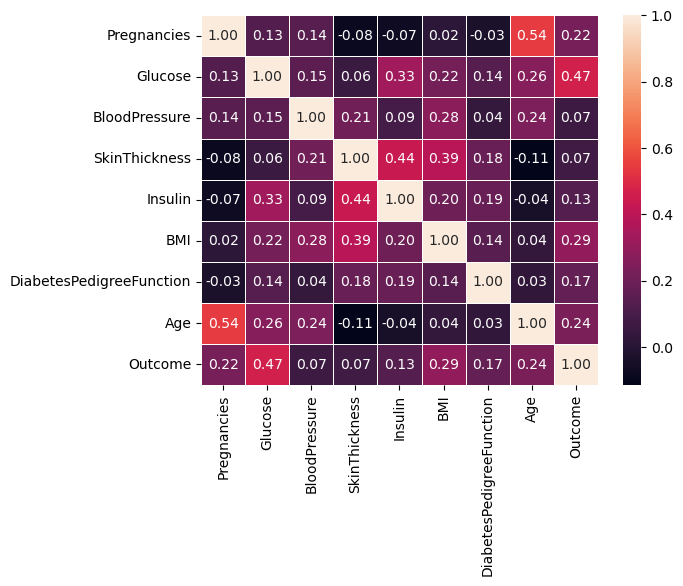

In [1149]:
sns.heatmap(data.corr() , annot=True , fmt="0.2f" , linewidths= 0.5)

<Axes: xlabel='Outcome', ylabel='count'>

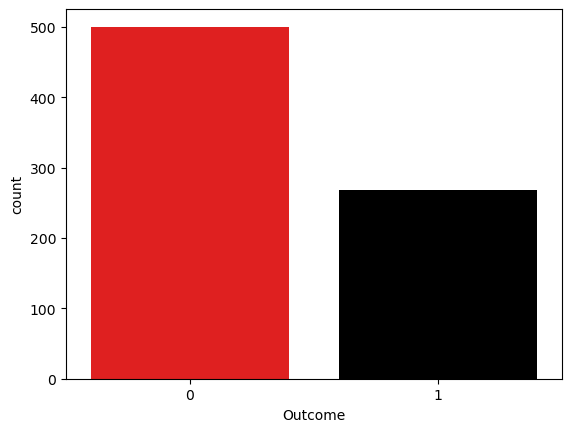

In [1150]:
sns.countplot(x = "Outcome" ,  data=data , palette=["r" , "k"])

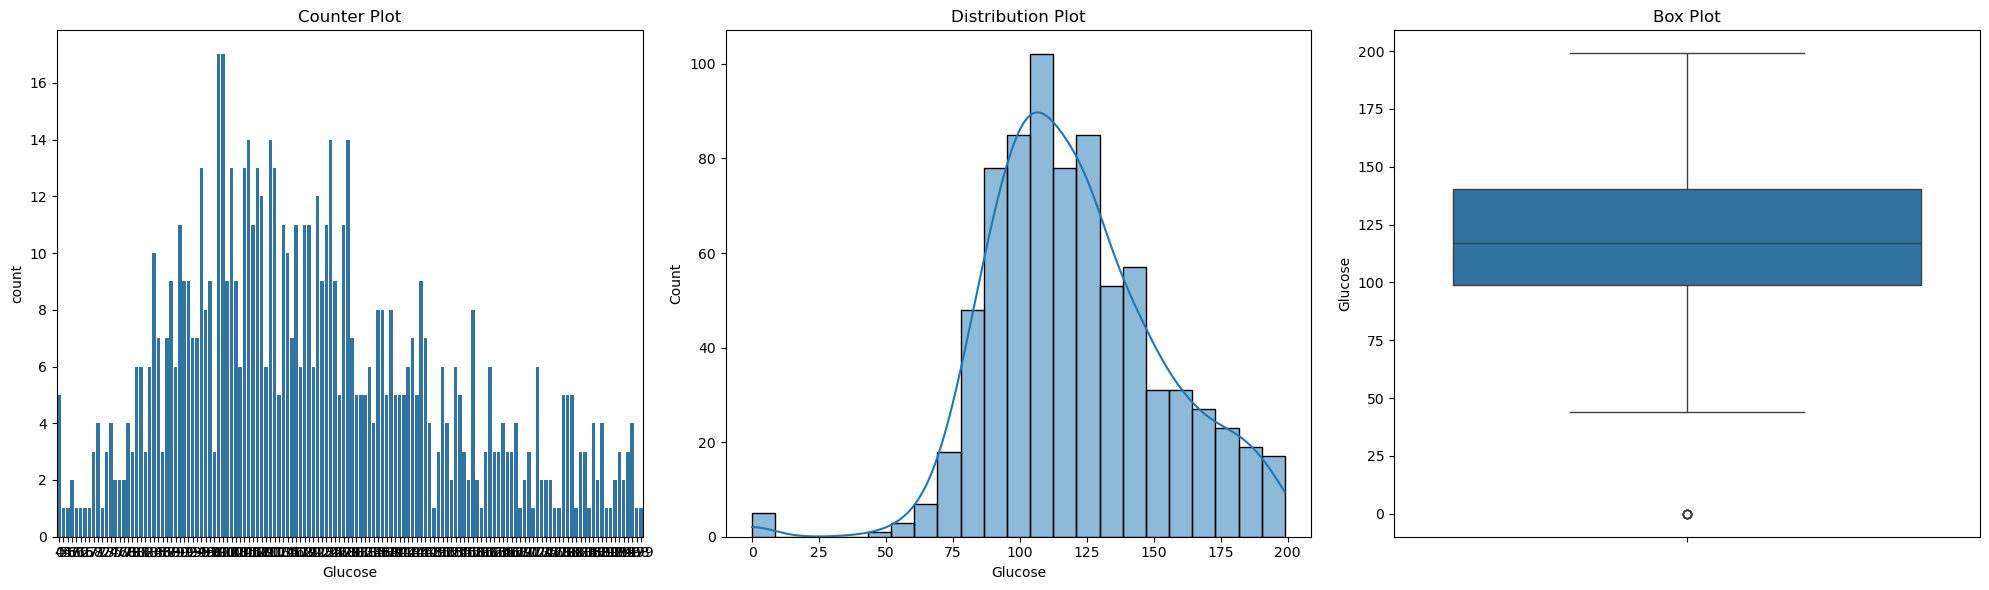

In [1151]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(x="Glucose", data=data, ax=axes[0])
axes[0].set_title("Counter Plot")

sns.histplot(data["Glucose"], kde=True, ax=axes[1])  
axes[1].set_title("Distribution Plot")

sns.boxplot(y=data["Glucose"], ax=axes[2])
axes[2].set_title("Box Plot")

plt.tight_layout() 
plt.show()


create model

In [1152]:
x = data.drop("Outcome" , axis=1)
y = data.Outcome

In [1153]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [1154]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [1155]:
rm = RandomOverSampler(random_state=42)
x_res , y_res = rm.fit_resample(x ,y)

In [1156]:
format(Counter(y))
format(Counter(y_res))

'Counter({1: 500, 0: 500})'

In [1157]:
x_train,x_test,y_train,y_test = train_test_split(x , y  , train_size=0.8 )

In [1158]:
model1 = LogisticRegression(solver="liblinear", max_iter=500)
model2 = SVC(probability=True)
model3 = RandomForestClassifier(random_state=42)
model4 = GradientBoostingClassifier(random_state=42)

param_grid1 = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100], 
    "penalty": ["l1", "l2"],               
    "class_weight": [None, "balanced"] 
}

param_grid2 = {
    "C": [0.1, 1, 10, 100],             
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1],  
    "class_weight": [None, "balanced"]
}

param_grid3 = {
    "n_estimators": [100, 500, 1000],  
    "max_depth": [10, 20, 30, None],     
    "min_samples_split": [2, 5, 10],      
    "min_samples_leaf": [1, 2, 4],         
    "max_features": ["sqrt", "log2", 0.5]
}

param_grid4 = {
    "learning_rate": [0.01, 0.05, 0.1],  
    "subsample": [0.6, 0.8, 1.0],         
    "max_depth": [3, 5, 7],            
    "max_features": [None, "sqrt", 0.5],
    "min_samples_split": [2, 5, 10] 
}

models_and_params = {
    "LogisticRegression": (model1, param_grid1),
    "SVC": (model2, param_grid2),
    "RandomForestClassifier": (model3, param_grid3),
    "GradientBoostingClassifier": (model4, param_grid4)
}

In [1159]:
result1 = []
result2 = []
result3 = []

In [1160]:
def modeling(model):
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    sns.heatmap(confusion_matrix(y_pred, y_test) , annot= True)

    print("accuracy : " , accuracy ,"recall : " , recall ,"f1 : " , f1_score)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)

accuracy :  0.8181818181818182 recall :  0.8461538461538461 f1 :  <function f1_score at 0x000001A944237880>


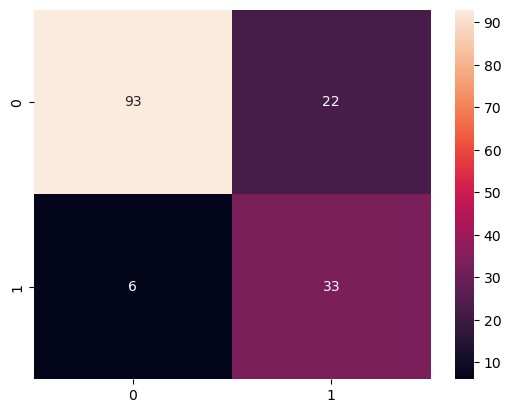

In [1161]:
modeling(model1)

accuracy :  0.7857142857142857 recall :  0.8928571428571429 f1 :  <function f1_score at 0x000001A944237880>


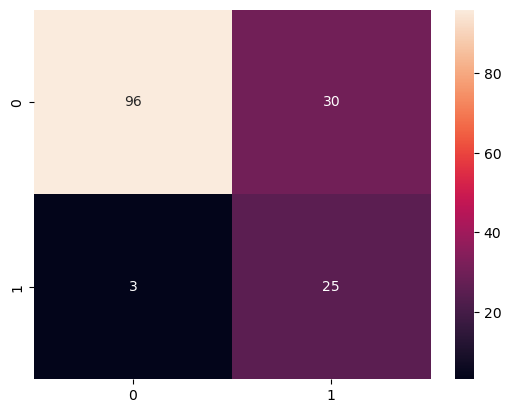

In [1162]:
modeling(model2)

accuracy :  0.8116883116883117 recall :  0.8095238095238095 f1 :  <function f1_score at 0x000001A944237880>


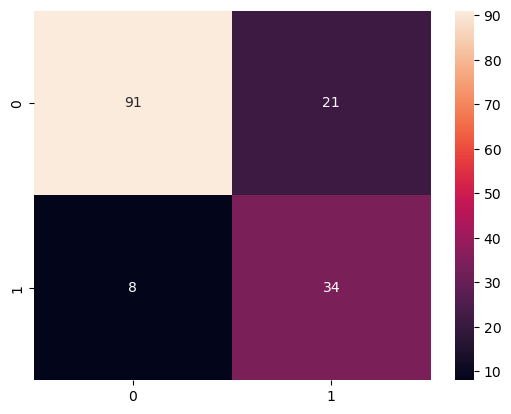

In [1163]:
modeling(model3)

accuracy :  0.8246753246753247 recall :  0.8181818181818182 f1 :  <function f1_score at 0x000001A944237880>


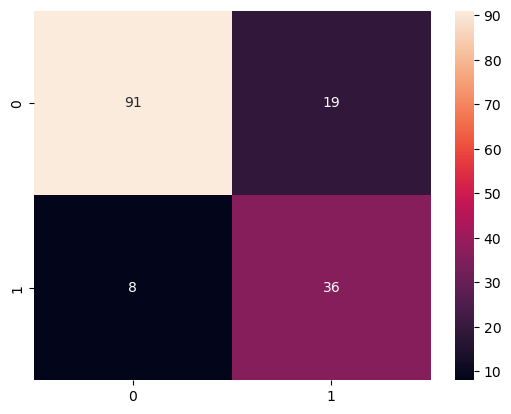

In [1164]:
modeling(model4)

In [1165]:
columns = ["LogisticRegression" ,"SVC" ,"RandomForestClassifier" , "GradientBoostingClassifier"]

In [1166]:
final_data = {"Algorithm" : columns , "accuracy" : result1 ,"recall_score" : result2 , "f1_score" : result3}
final_data = pd.DataFrame(final_data)
final_data

,Algorithm,accuracy,recall_score,f1_score
0,LogisticRegression,0.818182,0.846154,0.702128
1,SVC,0.785714,0.892857,0.602410
2,RandomForestClassifier,0.811688,0.809524,0.701031
3,GradientBoostingClassifier,0.824675,0.818182,0.727273


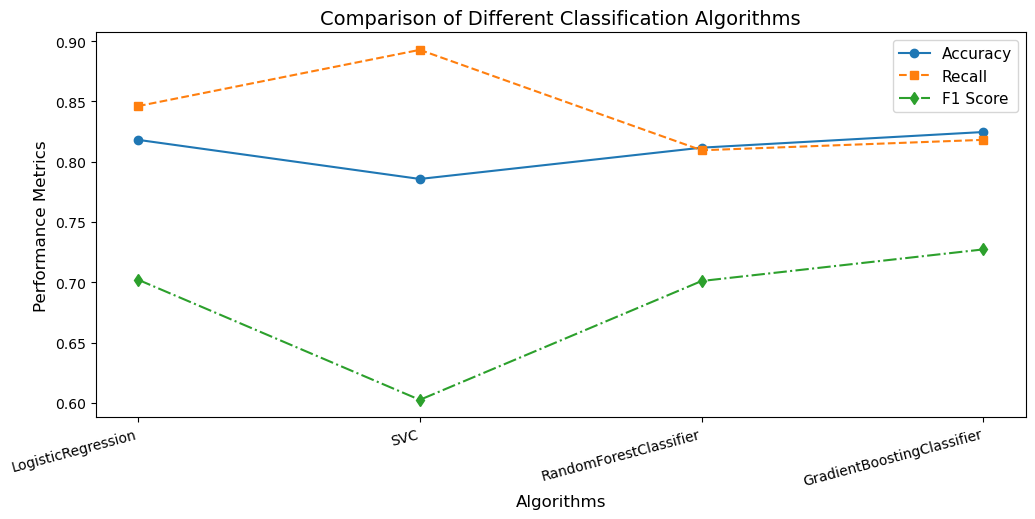

In [1167]:
 
fig, ax = plt.subplots(figsize=(12, 5))   

ax.plot(final_data.Algorithm, result1, marker='o', linestyle='-', label="Accuracy")
ax.plot(final_data.Algorithm, result2, marker='s', linestyle='--', label="Recall")
ax.plot(final_data.Algorithm, result3, marker='d', linestyle='-.', label="F1 Score")

ax.set_xlabel("Algorithms", fontsize=12)
ax.set_ylabel("Performance Metrics", fontsize=12)
ax.set_title("Comparison of Different Classification Algorithms", fontsize=14)

ax.set_xticks(range(len(final_data.Algorithm)))
ax.set_xticklabels(final_data.Algorithm, rotation=15, ha="right")

ax.legend(fontsize=11) 

plt.show()
